## Logistic Regression
Linear Regression can output any values, but there are scenarios where the expected output has to be between 0 and 1. For instance, in classification tasks, you would want to calculate the probability that the new sample belongs to a particular class. And probabilities have to be between 0 and 1, which Linear Regression doesn't respect. We can use the same gradient descent algorithm and modify the loss function a little bit to reflect the change in output to make it between 0 and 1.

One more reason why Linear Regression is not suitable is because it assumes that the data (residuals) is normally distributed, and this assumption is not satisfied when the data is binary (in classification problem).

Another reason for the failure of Linear Regression is, probability is often times not linear. Imagine a "U" shape where the probabilities are very high and very low at the extreme values of x.

One such function is the sigmoid activation. We'll see how the function is derived, and what are the properties of sigmoid. In a nutshell -- Linear Regression fits a straight line to the data. Logistic Regression fits a sigmoid to the data.

### Sigmoid Activation
Our requirement is,

$$0 \le h_\theta(x) \le 1$$

For starters, let's design a function that always outputs a positive value (remember probabilities are always non-negative). Consider the euler number $e$, $e$ raised to anything will always be positive. This function is called __Natural Exponentiation Function__.

### Intuitive explanation of Sigmoid
#### Why use $e^x$ and not something else? Why not $2^x$ or $45^x$?
Exponential functions have nice mathematical properties, few of them are as follows:

1. Exponential functions (Sigmoid) introduce non-linearity
2. Exponential functions are differentiable
3. Exponential functions are convex, therefore it has only global minimum, thus easy to optimize.

Now that we have only positive values, the next is to make it less than 1 (remember, probabilities are always less than 1). Now, for any positive number, if we divide that number by itself + 1, the output will always be less than 1. So our function becomes:

$$\frac{e^x}{e^x + 1}$$

Now we have the desired properties, the function is never lesser than 0 nor greater than 1. For simplification purpose, we divide both the numerator and the denominator by $e^x$, our function becomes,

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

### Mathematical derivation of Sigmoid / Logistic Regression
Logistic Regression relies on the principle of Maximum Likelihood Estimation (MLE). Intuitive definition of what MLE does is: Given certain data, there are multiple functions that can model it. Each of the functions tries to replicate what the underlying process does. MLE tries to find which of the function represents the underlying process accurately. Following are some before proceeding to the derivation.

#### Odds
Odds are nothing but the ratio of the probability that an event occurs vs the probability that an event does not occur. It is given by (assuming Bernoulli trials),

$$Odds = \frac{P(occuring)}{P(not \ occuring)} = \frac{p}{1 - p}$$

#### Logit
Because one is primarily interested in ratios and products of likelihoods, the logarithm of the likelihood function is often easier to work with, since logarithms convert multiplication to addition: ratios become differences, and products become sums.

$$logit(p) = ln \frac{p}{1 - p}$$

#### Sigmoid
The inverse of the Logit function is the Sigmoid function.


#### Principle
The principle of Logistic Regression is to maximize the log likelihood. The linear combination of data is represented as probability using the logit function.

Linear Regression representation was:

$$h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ....$$

In Logistic Regression, we assign a probability to it:

$$h_\theta(y=1|x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ....$$

The above equation is read as, the probability that y is equal to 1, given x. This is also called conditional probability. Now we represent this using logit.

$$\ln\left(\frac{p}{1-p}\right) = h_\theta(x)$$

Taking the exponential on both sides,

$$\frac{p}{1-p} = e^{h_\theta(x)}$$

After some algebra, we have,

$$p = \frac{1}{1+e^{-h_\theta(x)}}$$

Which is the definition of sigmoid.

### Gradient of sigmoid function

$
\begin{align}
\dfrac{d}{dx} \sigma(x) &= \dfrac{d}{dx} \left[ \dfrac{1}{1 + e^{-x}} \right] \\
&= \dfrac{d}{dx} \left( 1 + \mathrm{e}^{-x} \right)^{-1} \\
&= -(1 + e^{-x})^{-2}(-e^{-x}) \\
&= \dfrac{e^{-x}}{\left(1 + e^{-x}\right)^2} \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \dfrac{e^{-x}}{1 + e^{-x}}  \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \dfrac{(1 + e^{-x}) - 1}{1 + e^{-x}}  \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \left( \dfrac{1 + e^{-x}}{1 + e^{-x}} - \dfrac{1}{1 + e^{-x}} \right) \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \left( 1 - \dfrac{1}{1 + e^{-x}} \right) \\
&= \sigma(x) \cdot (1 - \sigma(x))
\end{align}
$

### Visualizing sigmoid

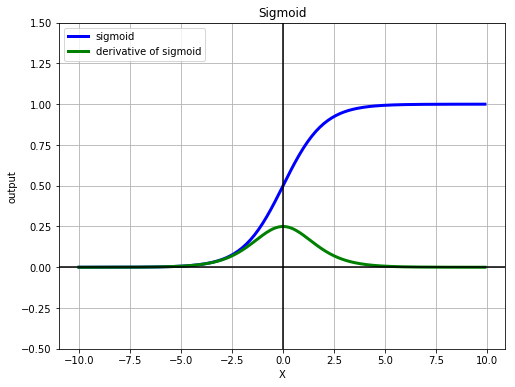

In [10]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def grad_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

X = np.arange(-10, 10, 0.1)
plt.figure(figsize = (8, 6))
plt.plot(X, sigmoid(X), label = 'sigmoid', c = 'blue', linewidth = 3)
plt.plot(X, grad_sigmoid(X), label = 'derivative of sigmoid', c = 'green', linewidth = 3)
plt.xlabel('X')
plt.ylabel('output')
plt.legend(loc = 'upper left')
plt.grid(True)
plt.title('Sigmoid')
plt.ylim([-0.5, 1.5])
plt.axhline(y = 0, color = 'k')
plt.axvline(x = 0, color = 'k')
plt.show()